# Density and Contour Plots

Sometimes it can be useful to display three-dimensional data in a two-dimensional plot using contours or color-coded regions. Matplotlib provides three functions that can be helpful for this task: `plt.contour` for contour plots, `plt.contourf` for filled contour plots, and `plt.imshow` for showing images. Let's take a closer look at some examples of what we can do using these.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

## Three-Dimensional Function Visualization

We'll start by demonstrating a contour plot using a function $z = f(x, y)$, where $f$ is defined as:

In [2]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

We can create a contour plot using the `plt.contour` function. It takes three arguments: a grid of _x_ values, a grid of _y_ values, and a grid of _z_ values. The _x_ and _y_ values represent position on the plot, and the _z_ values will be represented by the contour levels. We can prepare such data using the very straightforward `np.meshgrid` function, which builds two-dimensional grids from one-dimensional arrays:

In [3]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

This is what a standard line-only contour plot looks like:

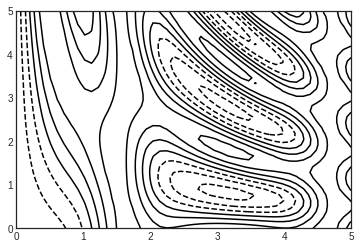

In [4]:
plt.contour(X, Y, Z, colors='k');

By default, negative values are represented by dashed lines (and positive values by solid lines) when a single color is used. Alternatively, lines can be color-coded by specifying the colormap with the `cmap` argument. We will also specify that we want more lines to be drawn: 20 equally spaced intervals within the data range:

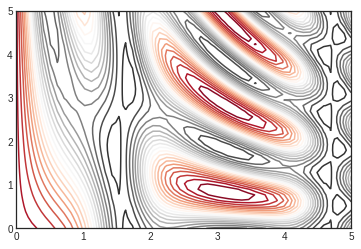

In [5]:
plt.contour(X, Y, Z, 20, cmap='RdGy');

We chose the `RdGy` (short for _Red-Gray_) colormap since it is a good choice for centered data. Matplotlib has a wide range of colormaps available, as can be seen in this [reference](https://matplotlib.org/gallery/color/colormap_reference.html?highlight=colormap).

The plot looks better, but the spaces between lines might be distracting. We can circumvent this by switching to a filled contour plot using the `plt.contourf()` function, which uses largely the same syntax as `plt.contour()`.

Additionally, we'll add the `plt.colorbar()` command to automatically create an additional axis with labeled color information for the plot:

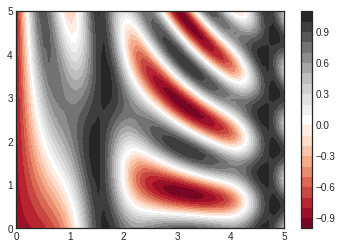

In [6]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

The colorbar makes it clear that the black regions are peaks, while the red regions are valleys.

One potential issue with this plot is that the color steps are discrete rather than continuous, which is not always desired since the transition of colors is not as smooth. This could be remedied by specifying the number of contours to a very high number, but this results in a rather inefficient plot given that a new polygon must be rendered for each step in the level.

A better way to handle this is to use the `plt.imshow()` function, which interprets a two-dimensional grid of data as an image:

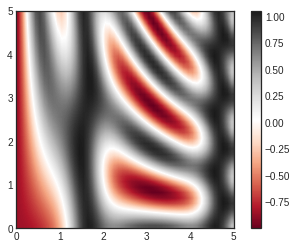

In [7]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy', interpolation='bilinear')
plt.colorbar();

There are a few potential gotchas with `plt.imshow()`, however:

- `plt.imshow()` does not accept and _x_ and _y_ grid, so we must manually specify the _extent[xmin, xmax, ymin, ymax]_ of the image on the plot
- `plt.imshow()` by default follows the standard image array definition where the origin is in the upper left. We can't change this behavior by specifying the `origin` parameter.

Finally, it can sometimes be useful to combine contour plots and image plots. For example, here we'll use a partially transparent background image (hence the `alpha=0.5` parameter) and overplot contours with labels on the contours themselves (using the `plt.clabel()` function):

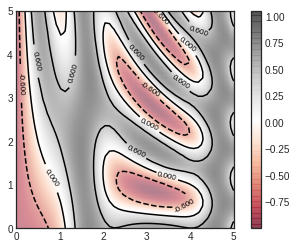

In [8]:
contours = plt.contour(X, Y, Z, 3, colors='k')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy', interpolation='bilinear', alpha=0.5)
plt.colorbar();

The combination of these three functions gives us many possibilities for displaying this sort of three-dimensional data within a two-dimensional plot.